<a href="https://colab.research.google.com/github/tylerb55/COMP530/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/tylerb55/COMP530.git

fatal: destination path 'COMP530' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd
import collections
import matplotlib.image as img
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

Split the test and validation set

In [3]:
def Train_Validation_Test_Set(directory_name):
  """a function to load the images in a large directory into a tensorflow dataset object
  the data is split 80:10:10 in training:validation:test. The dataset is shuffled before splitting
  and the images are formatted to 512x512 pixels and grayscale(one color channel and the values range from 0 to 255)"""
  dataset_train=tf.keras.preprocessing.image_dataset_from_directory('/content/COMP530/'+directory_name,
                                                                    labels='inferred',
                                                                    label_mode='int',
                                                                    class_names=['NormalCases','cancercases'],
                                                                    color_mode='grayscale',
                                                                    image_size=(512,512),
                                                                    shuffle=True,
                                                                    seed=305,
                                                                    validation_split=0.2,
                                                                    subset='training',
                                                                    batch_size=None
                                                                    )

  dataset_validation=tf.keras.preprocessing.image_dataset_from_directory('/content/COMP530/'+directory_name,
                                                                    labels='inferred',
                                                                    label_mode='int',
                                                                    class_names=['NormalCases','cancercases'],
                                                                    color_mode='grayscale',
                                                                    image_size=(512,512),
                                                                    shuffle=True,
                                                                    seed=305,
                                                                    validation_split=0.2,
                                                                    subset='validation',
                                                                    batch_size=None
                                                                    )
  
  dataset_test=tf.keras.preprocessing.image_dataset_from_directory('/content/COMP530/'+directory_name,
                                                                    labels='inferred',
                                                                    label_mode='int',
                                                                    class_names=['NormalCases','cancercases'],
                                                                    color_mode='grayscale',
                                                                    image_size=(512,512),
                                                                    shuffle=True,
                                                                    seed=305,
                                                                    validation_split=0.1,
                                                                    subset='validation',
                                                                    batch_size=None
                                                                    )
    
  dataset_validation=dataset_validation.take(dataset_test.__len__())

  return dataset_train,dataset_validation,dataset_test

In [4]:
def AlexNetPreprocess(image,label):
  image = tf.image.per_image_standardization(image)
  # Resize images from 512x512 to 227x227
  image = tf.image.resize(image, (227,227))
  return image, label

In [5]:
BATCH_SIZE=32

dataset_train,dataset_validation, dataset_test=Train_Validation_Test_Set("Dataset1")
dataset_train=dataset_train.map(AlexNetPreprocess).batch(batch_size=BATCH_SIZE,drop_remainder=True)
dataset_validation=dataset_validation.map(AlexNetPreprocess).batch(batch_size=BATCH_SIZE,drop_remainder=True)
dataset_test=dataset_test.map(AlexNetPreprocess).batch(batch_size=BATCH_SIZE,drop_remainder=True)

Found 1097 files belonging to 2 classes.
Using 878 files for training.
Found 1097 files belonging to 2 classes.
Using 219 files for validation.
Found 1097 files belonging to 2 classes.
Using 109 files for validation.


In [6]:
def AlexNet_model():
   return tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(227,227,1)),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                                      tf.keras.layers.Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                                      tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(4096,activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(4096,activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(1,activation='softmax')
])

AlexNet = AlexNet_model()

In [7]:
AlexNet.compile(loss='binary_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [8]:
history=AlexNet.fit(dataset_train,epochs=50,validation_data=dataset_validation,validation_freq=1)

Epoch 1/50
27/27 [==============================] - 12s 110ms/step - loss: 1.2768 - accuracy: 0.6215 - val_loss: 0.6832 - val_accuracy: 0.6042
Epoch 2/50
27/27 [==============================] - 3s 47ms/step - loss: 0.6965 - accuracy: 0.6215 - val_loss: 0.6736 - val_accuracy: 0.5938
Epoch 3/50
27/27 [==============================] - 3s 47ms/step - loss: 0.6171 - accuracy: 0.6192 - val_loss: 0.6262 - val_accuracy: 0.6875
Epoch 4/50
27/27 [==============================] - 3s 54ms/step - loss: 0.4544 - accuracy: 0.6192 - val_loss: 0.6940 - val_accuracy: 0.5625
Epoch 5/50
27/27 [==============================] - 3s 46ms/step - loss: 0.3835 - accuracy: 0.6204 - val_loss: 0.6454 - val_accuracy: 0.6458
Epoch 6/50
27/27 [==============================] - 3s 55ms/step - loss: 0.2635 - accuracy: 0.6215 - val_loss: 0.6759 - val_accuracy: 0.6354
Epoch 7/50
27/27 [==============================] - 3s 54ms/step - loss: 0.2259 - accuracy: 0.6227 - val_loss: 0.7023 - val_accuracy: 0.6146
Epoch 8/50


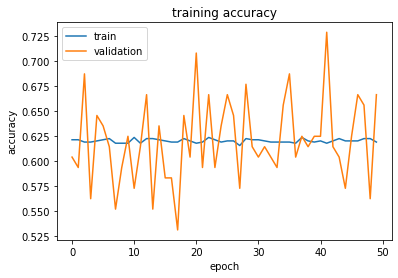

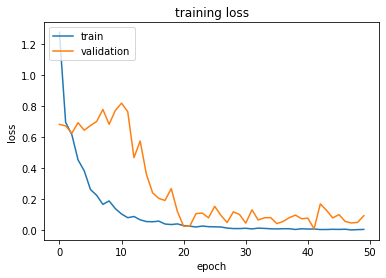

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Test the model on the test set and evaluate performance

In [10]:
AlexNet.evaluate(dataset_test)

3/3 [==============================] - 0s 24ms/step - loss: 0.0977 - accuracy: 0.5521


[0.09770000725984573, 0.5520833134651184]

Produce graphs and visualisations for test data

In [11]:
predictions=AlexNet.predict(dataset_test)
target=np.array([],'int32')
for element in dataset_test.as_numpy_iterator():
  target=np.append(target,element[1])

epoch_precision=[]
epoch_recall=[]
epoch_accuracy=[]
tp=0
tn=0
fp=0
fn=0
for i in range(len(predictions)):
  if(np.argmax(predictions[i])==1 and target[i]==1):
    tp+=1
  elif(np.argmax(predictions[i])==1 and target[i]==0):
    fp+=1
  elif(np.argmax(predictions[i])==0 and target[i]==0):
    tn+=1
  elif(np.argmax(predictions[i])==0 and target[i]==1):
    fn+=1
  if((i+1)%BATCH_SIZE==0):
    epoch_accuracy.append((tp+tn)/(tp+fn+tn+fp))
    epoch_precision.append((tp/(fp+tp)))
    epoch_recall.append((tp/(fn+tp)))
print("accuracy:",epoch_accuracy)
print("recall:",epoch_recall)
print("precision:",epoch_precision)


ZeroDivisionError: ignored